In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  classification_report
import itertools

In [16]:
model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(17,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)       

In [17]:
train_path='Dataset/train'
test_path='Dataset/test'
valid_path='Dataset/valid'

In [18]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

In [21]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(100,100),
                                                batch_size=12,
                                                class_mode='categorical')

Found 6800 images belonging to 17 classes.


In [23]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                           target_size=(100,100),
                                           batch_size=12,
                                           class_mode='categorical')

Found 2040 images belonging to 17 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

In [25]:
test_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(100,100),
                                                batch_size=12,
                                                class_mode='categorical',
                                                shuffle=False)

Found 850 images belonging to 17 classes.


In [26]:
hist=model.fit(training_set,
          steps_per_epoch=len(training_set),
        epochs = 15,
        validation_data = valid_set,
         validation_steps=len(test_set)) 

Epoch 1/15
567/567 [==============================] - 47s 83ms/step - loss: 0.8019 - accuracy: 0.7337 - val_loss: 0.0642 - val_accuracy: 0.9800
Epoch 2/15
567/567 [==============================] - 20s 36ms/step - loss: 0.1245 - accuracy: 0.9612 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/15
567/567 [==============================] - 21s 37ms/step - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0109 - val_accuracy: 0.9965
Epoch 4/15
567/567 [==============================] - 20s 36ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/15
567/567 [==============================] - 20s 36ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 5.8870e-04 - val_accuracy: 1.0000.0613 - accuracy: 0.98
Epoch 6/15
567/567 [==============================] - 20s 35ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7/15
567/567 [==============================] - 20s 35ms/step - loss: 0.0337 - accuracy: 0.9904 - val_lo

In [31]:
model.save('model1.h5')

In [27]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
score = model.evaluate(test_set)
print(score)

71/71 [==============================] - 6s 85ms/step - loss: 9.9175e-04 - accuracy: 1.0000
[0.000991752021946013, 1.0]


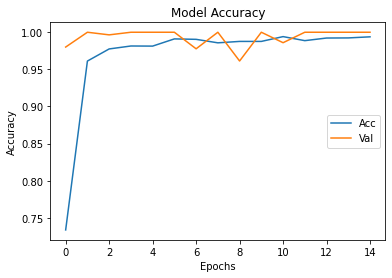

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'center right')
plt.show()

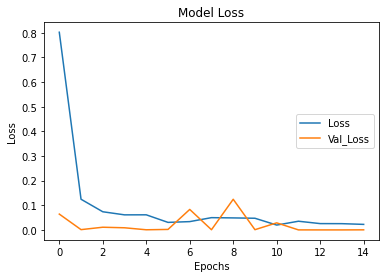

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val_Loss'], loc = 'center right')
plt.show()

In [33]:
predictions= model.predict(test_set)

In [34]:
predictions

array([[9.99552667e-01, 4.44884936e-04, 2.04468347e-06, ...,
        2.12801131e-13, 3.18904902e-10, 2.50944109e-11],
       [9.99735773e-01, 2.64114176e-04, 2.98497627e-09, ...,
        4.44007604e-16, 3.32294652e-12, 2.75310590e-13],
       [9.99940991e-01, 5.90117634e-05, 1.08259575e-10, ...,
        3.09345366e-18, 1.92821074e-13, 8.13328236e-15],
       ...,
       [8.92224388e-18, 1.13648057e-17, 1.27891569e-17, ...,
        7.81652965e-10, 2.63139078e-18, 1.00000000e+00],
       [4.11792636e-19, 2.94465814e-18, 4.87325689e-16, ...,
        2.06797495e-08, 2.97175078e-19, 1.00000000e+00],
       [5.97223473e-21, 5.00577750e-20, 1.19685987e-17, ...,
        3.43277776e-07, 3.30862972e-20, 9.99999642e-01]], dtype=float32)

In [35]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [36]:
rounded_prediction = np.argmax(predictions,axis=-1)

In [37]:
count=0
for i in rounded_prediction:
    count+=1
    print("Image: ",count," Prediction: ",i," Label: ",test_set.classes[i])

Image:  1  Prediction:  0  Label:  0
Image:  2  Prediction:  0  Label:  0
Image:  3  Prediction:  0  Label:  0
Image:  4  Prediction:  0  Label:  0
Image:  5  Prediction:  0  Label:  0
Image:  6  Prediction:  0  Label:  0
Image:  7  Prediction:  0  Label:  0
Image:  8  Prediction:  0  Label:  0
Image:  9  Prediction:  0  Label:  0
Image:  10  Prediction:  0  Label:  0
Image:  11  Prediction:  0  Label:  0
Image:  12  Prediction:  0  Label:  0
Image:  13  Prediction:  0  Label:  0
Image:  14  Prediction:  0  Label:  0
Image:  15  Prediction:  0  Label:  0
Image:  16  Prediction:  0  Label:  0
Image:  17  Prediction:  0  Label:  0
Image:  18  Prediction:  0  Label:  0
Image:  19  Prediction:  0  Label:  0
Image:  20  Prediction:  0  Label:  0
Image:  21  Prediction:  0  Label:  0
Image:  22  Prediction:  0  Label:  0
Image:  23  Prediction:  0  Label:  0
Image:  24  Prediction:  0  Label:  0
Image:  25  Prediction:  0  Label:  0
Image:  26  Prediction:  0  Label:  0
Image:  27  Predictio

Image:  350  Prediction:  6  Label:  0
Image:  351  Prediction:  7  Label:  0
Image:  352  Prediction:  7  Label:  0
Image:  353  Prediction:  7  Label:  0
Image:  354  Prediction:  7  Label:  0
Image:  355  Prediction:  7  Label:  0
Image:  356  Prediction:  7  Label:  0
Image:  357  Prediction:  7  Label:  0
Image:  358  Prediction:  7  Label:  0
Image:  359  Prediction:  7  Label:  0
Image:  360  Prediction:  7  Label:  0
Image:  361  Prediction:  7  Label:  0
Image:  362  Prediction:  7  Label:  0
Image:  363  Prediction:  7  Label:  0
Image:  364  Prediction:  7  Label:  0
Image:  365  Prediction:  7  Label:  0
Image:  366  Prediction:  7  Label:  0
Image:  367  Prediction:  7  Label:  0
Image:  368  Prediction:  7  Label:  0
Image:  369  Prediction:  7  Label:  0
Image:  370  Prediction:  7  Label:  0
Image:  371  Prediction:  7  Label:  0
Image:  372  Prediction:  7  Label:  0
Image:  373  Prediction:  7  Label:  0
Image:  374  Prediction:  7  Label:  0
Image:  375  Prediction: 

Image:  669  Prediction:  13  Label:  0
Image:  670  Prediction:  13  Label:  0
Image:  671  Prediction:  13  Label:  0
Image:  672  Prediction:  13  Label:  0
Image:  673  Prediction:  13  Label:  0
Image:  674  Prediction:  13  Label:  0
Image:  675  Prediction:  13  Label:  0
Image:  676  Prediction:  13  Label:  0
Image:  677  Prediction:  13  Label:  0
Image:  678  Prediction:  13  Label:  0
Image:  679  Prediction:  13  Label:  0
Image:  680  Prediction:  13  Label:  0
Image:  681  Prediction:  13  Label:  0
Image:  682  Prediction:  13  Label:  0
Image:  683  Prediction:  13  Label:  0
Image:  684  Prediction:  13  Label:  0
Image:  685  Prediction:  13  Label:  0
Image:  686  Prediction:  13  Label:  0
Image:  687  Prediction:  13  Label:  0
Image:  688  Prediction:  13  Label:  0
Image:  689  Prediction:  13  Label:  0
Image:  690  Prediction:  13  Label:  0
Image:  691  Prediction:  13  Label:  0
Image:  692  Prediction:  13  Label:  0
Image:  693  Prediction:  13  Label:  0


In [38]:
test_set.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [39]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [40]:
cm = confusion_matrix(y_true=test_set.classes,y_pred=rounded_prediction)

In [41]:
cm_plot_labels=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]

Confusion matrix, without normalization
[[50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 50]]


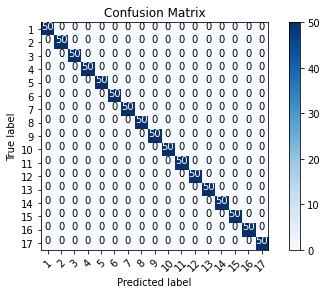

In [42]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [43]:
print(classification_report(test_set.classes,rounded_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        50

    accuracy              